##2. Random Forest for Image Approximation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! gdown --id 14Aty9i1JkVSPWPD12sLUBDb6pnPQ7xcE

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14Aty9i1JkVSPWPD12sLUBDb6pnPQ7xcE
To: /content/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg
100% 178k/178k [00:00<00:00, 104MB/s]


# a. Start with an image of the Mona Lisa.

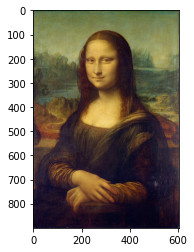

In [4]:
df= imread("Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg",'r')
imshow(df)

In [5]:
np.shape(df)

(900, 604, 3)

# b. Preprocessing the input. 

Uniformly sample 5,000 random (x , y )
coordinate locations.

What other preprocessing steps are necessary for random forests inputs? Describe them,
implement them, and justify your decisions. In particular, do you need to perform mean
subtraction, standardization, or unit-normalization?

There's no need to do preprocessing data as one of the pros of random forest is we don't need to preprocess the data.

In [6]:
np.random.seed(1)
x_random= np.random.choice(df.shape[0], size=5000)
y_random= np.random.choice(df.shape[1], size=5000)
x_train= np.array([x_random, y_random]).T
x_train

array([[ 37, 367],
       [235, 587],
       [ 72, 171],
       ...,
       [220, 210],
       [277, 555],
       [469, 236]])

# c. Preprocessing the output.

 Sample pixel values at each of the given coordinate locations.
Each pixel contains red, green, and blue intensity values, so decide how you want to handle
this. 

We're going to process by regress all colors at once from x_test (represent coordinates) to y_test (represent RGB colors)

In [7]:
#Sample pixel values
y_train = df[x_random, y_random]
y_train

array([[113, 132,  87],
       [136, 144, 107],
       [117, 126,  73],
       ...,
       [ 61,  27,  26],
       [ 81,  93,  71],
       [213, 178,  84]], dtype=uint8)

In [8]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators= 10, max_depth=5)
random_forest= model.fit(x_train, y_train)

In [9]:
height, width= df.shape[0], df.shape[1]
prediction= np.zeros([height, width, 3])
x_test = np.array([[i, j] for i in range(height) for j in range(width)])
x_test

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [899, 601],
       [899, 602],
       [899, 603]])

In [10]:
y_test= random_forest.predict(x_test)

# d. Build final image using imshow to view the result

In [11]:
generate_image= y_test/255
generate_image

array([[0.31488127, 0.41577731, 0.25762234],
       [0.31488127, 0.41577731, 0.25762234],
       [0.31488127, 0.41577731, 0.25762234],
       ...,
       [0.11204868, 0.05304629, 0.12996184],
       [0.11204868, 0.05304629, 0.12996184],
       [0.11204868, 0.05304629, 0.12996184]])

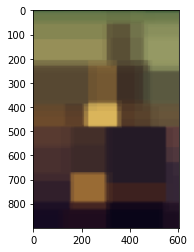

In [12]:
imshow(generate_image.reshape(height, width,3))

# e. Experimentation

In [21]:
def random_forest_function(ndepth, ntrees):
  model= RandomForestRegressor(n_estimators= ntrees, max_depth=ndepth)
  random_forest= model.fit(x_train, y_train)
  y_test= random_forest.predict(x_test)
  generate_image= y_test/255
  imshow(generate_image.reshape(height, width,3))
  plt.title("Depth="+str(ndepth)+", Estimator=" + str(ntrees))
  plt.show()

i. Repeat experiment with depth 1,2,5,10,15 with single decision tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


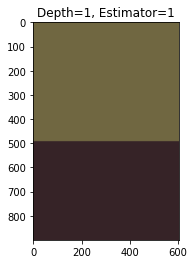

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


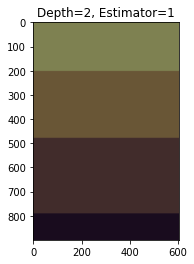

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


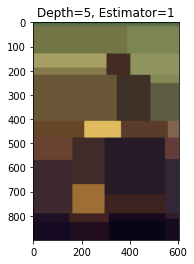

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


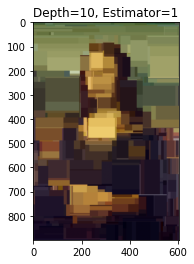

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


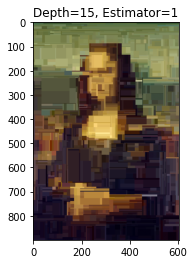

In [24]:
depth= [1,2,5,10,15]
for i in depth:
  prediction= np.zeros([height, width, 3])
  x_test = np.array([[i, j] for i in range(height) for j in range(width)])
  random_forest_function(i, 1)

Analysis: Depth significantly improved the performance of prediction as we can see from above result. The higher the depth, the better the performance. This is due to our model can capture more information with deeper tree (having more branch).

ii. Repeat experiment with depth 7 and number of trees of 1,3,5,10, and 100

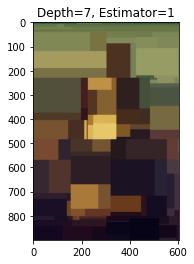

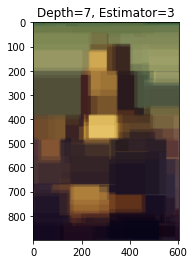

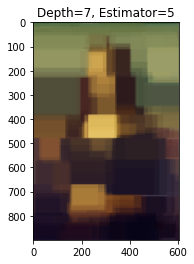

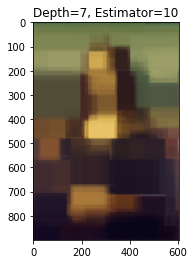

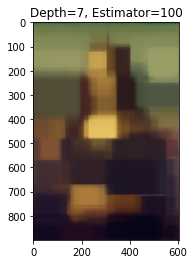

In [15]:
trees= [1,3,5,10,100]
for i in trees:
  prediction= np.zeros([height, width, 3])
  x_test = np.array([[i, j] for i in range(height) for j in range(width)])
  random_forest_function(7, i)

From our result, number of trees significantly improved the performance from 1 to 3. However, number of trees didn't really improve the prediction as much starting from 3 to 100. This means that number of trees doesn't mean the performance will be significantly better than fewer trees.

iii. Experiment using K-NN regress for k=1

In [16]:
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors=1)
knn = model.fit(x_train, y_train)
y_test= knn.predict(x_test)

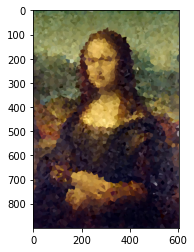

In [17]:
generate_image= y_test/255
imshow(generate_image.reshape(height, width,3))

K-NN with k=1 resulting in the best prediction compared to random forest. As mentioned in the question, k=1 means that every predicted pixel in y_test will equal to nearest ouput from y_train. The model will closely follow the training data and thus resulting in a good prediction of training data and tends to overfit.

iv. Experiment with different pruning strategies

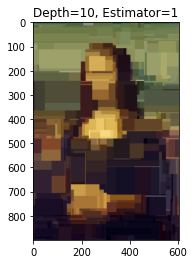

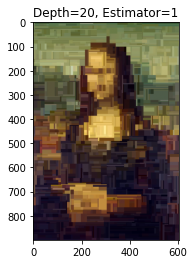

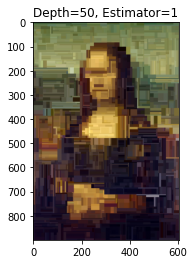

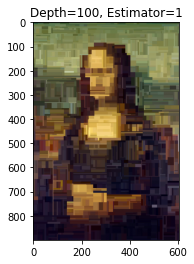

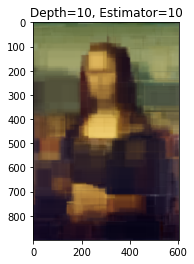

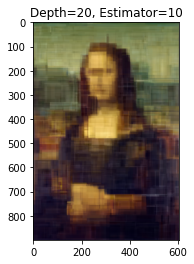

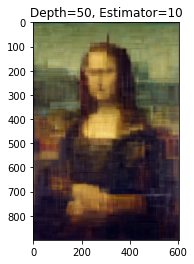

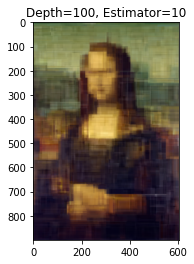

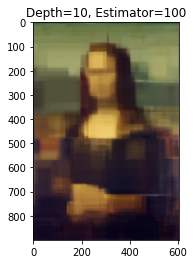

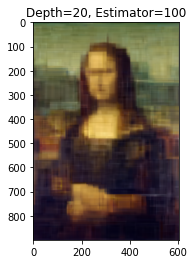

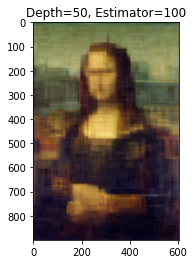

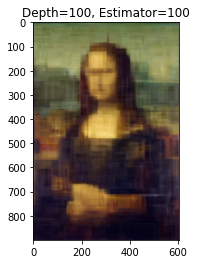

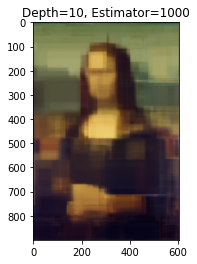

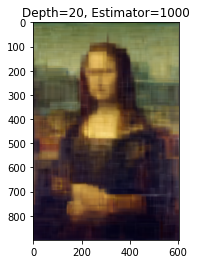

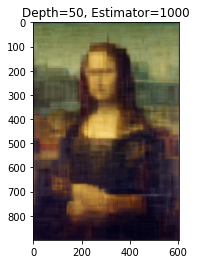

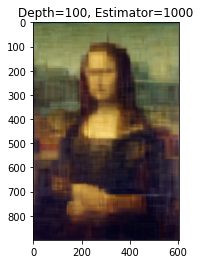

In [20]:
trees= [1,10,100,1000]
depth= [10,20,50,100]
for i in trees:
  for j in depth:
    prediction= np.zeros([height, width, 3])
    x_test = np.array([[i, j] for i in range(height) for j in range(width)])
    random_forest_function(j, i)

After our first experimentation, we notice that low depth resulting in a very low prediction. Therefore, we're interested in improve our model and look what will happen if we use depth above 20 and different number of trees. From our experimentation above, significant increase in prediction is found when we increase the depth and using single decision tree. 

However, when we choose a higher depth (e.g: 50,100), no significant improvement is found eventhough we also tried to improve the number of trees. Interesting observation is also found where high degrees of estimator resulting in a high computational time, especially when we trie with 100 decision trees.

Therefore, to conclude, we have to find the most optimal trees and depth to determine the threshold in which there's no significant improvement with computational cost taken into account.

# f. Analysis

i. What is the decision rule at each split point? Write down the 1-line formula for the split point at the root node for one of the trained decision trees inside the forest. Feel free to define any variables you need.

In [25]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators= 3, max_depth=5)
random_forest= model.fit(x_train, y_train)

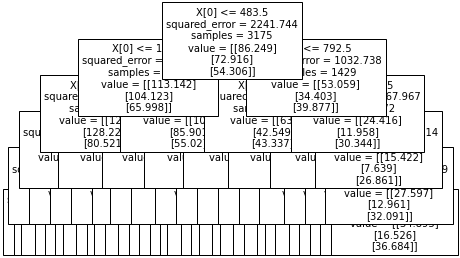

In [27]:
nodes = tree.plot_tree(random_forest.estimators_[0], fontsize=10)

As seen above is the decision rule at each split point. At the root node, we can look that the decision point depends on the coordinate X[0] <= 483.5

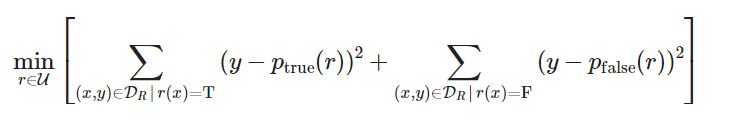

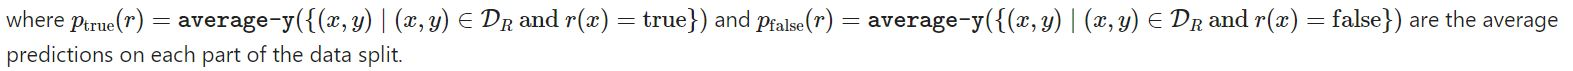

b. Why does the resulting image look like the way it does? What shape are the patches of color, and how are they arranged?

The resulting image looks like mosaic because those color bloacks are determined by decision regions, which are learnt from the decision tree algorithm.

The patches of different colors are rectangular shaped, and arranged according to how close the colours of each pixel are comparing to the center of the decision region.